In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [141]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [142]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [143]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [144]:
df.shape

(13320, 9)

In [145]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [147]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [148]:
x = []
for i in df['total_sqft']:
    x.append(i)

In [149]:
y = [i.split(' ') for i in x]

In [150]:
y

[['1056'],
 ['2600'],
 ['1440'],
 ['1521'],
 ['1200'],
 ['1170'],
 ['2732'],
 ['3300'],
 ['1310'],
 ['1020'],
 ['1800'],
 ['2785'],
 ['1000'],
 ['1100'],
 ['2250'],
 ['1175'],
 ['1180'],
 ['1540'],
 ['2770'],
 ['1100'],
 ['600'],
 ['1755'],
 ['2800'],
 ['1767'],
 ['510'],
 ['1250'],
 ['660'],
 ['1610'],
 ['1151'],
 ['1025'],
 ['2100', '-', '2850'],
 ['1075'],
 ['1760'],
 ['1693'],
 ['1925'],
 ['700'],
 ['1070'],
 ['1724'],
 ['1290'],
 ['1143'],
 ['1296'],
 ['1254'],
 ['600'],
 ['660'],
 ['1330.74'],
 ['600'],
 ['970'],
 ['1459'],
 ['800'],
 ['869'],
 ['1270'],
 ['1670'],
 ['2010'],
 ['1185'],
 ['1600'],
 ['1200'],
 ['3010', '-', '3410'],
 ['1500'],
 ['1407'],
 ['840'],
 ['4395'],
 ['845'],
 ['5700'],
 ['1160'],
 ['3000'],
 ['1100'],
 ['1140'],
 ['1220'],
 ['1350'],
 ['1005'],
 ['500'],
 ['1358'],
 ['1569'],
 ['1240'],
 ['2089'],
 ['1206'],
 ['1150'],
 ['2511'],
 ['460'],
 ['4400'],
 ['1660'],
 ['2957', '-', '3450'],
 ['1326'],
 ['1325'],
 ['1499'],
 ['3000'],
 ['1665'],
 ['708'],
 ['10

In [151]:
for i in range(len(y)):
    if len(y[i])>1:
        y[i].clear()
    elif 'Perch' in y[i][0]:
       y[i].clear()
    elif 'Acres' in y[i][0]:
        y[i].clear()
    elif 'Cents' in y[i][0]:
        y[i].clear()
    elif 'Guntha' in y[i][0]:
        y[i].clear()
    elif 'Grounds' in y[i][0]:
        y[i].clear()

In [152]:
for i in y:
    if len(i) == 1:
        i[0] = float(i[0])

In [153]:
y

[[1056.0],
 [2600.0],
 [1440.0],
 [1521.0],
 [1200.0],
 [1170.0],
 [2732.0],
 [3300.0],
 [1310.0],
 [1020.0],
 [1800.0],
 [2785.0],
 [1000.0],
 [1100.0],
 [2250.0],
 [1175.0],
 [1180.0],
 [1540.0],
 [2770.0],
 [1100.0],
 [600.0],
 [1755.0],
 [2800.0],
 [1767.0],
 [510.0],
 [1250.0],
 [660.0],
 [1610.0],
 [1151.0],
 [1025.0],
 [],
 [1075.0],
 [1760.0],
 [1693.0],
 [1925.0],
 [700.0],
 [1070.0],
 [1724.0],
 [1290.0],
 [1143.0],
 [1296.0],
 [1254.0],
 [600.0],
 [660.0],
 [1330.74],
 [600.0],
 [970.0],
 [1459.0],
 [800.0],
 [869.0],
 [1270.0],
 [1670.0],
 [2010.0],
 [1185.0],
 [1600.0],
 [1200.0],
 [],
 [1500.0],
 [1407.0],
 [840.0],
 [4395.0],
 [845.0],
 [5700.0],
 [1160.0],
 [3000.0],
 [1100.0],
 [1140.0],
 [1220.0],
 [1350.0],
 [1005.0],
 [500.0],
 [1358.0],
 [1569.0],
 [1240.0],
 [2089.0],
 [1206.0],
 [1150.0],
 [2511.0],
 [460.0],
 [4400.0],
 [1660.0],
 [],
 [1326.0],
 [1325.0],
 [1499.0],
 [3000.0],
 [1665.0],
 [708.0],
 [1060.0],
 [710.0],
 [1000.0],
 [1000.0],
 [1450.0],
 [1200.0],

In [154]:
y

[[1056.0],
 [2600.0],
 [1440.0],
 [1521.0],
 [1200.0],
 [1170.0],
 [2732.0],
 [3300.0],
 [1310.0],
 [1020.0],
 [1800.0],
 [2785.0],
 [1000.0],
 [1100.0],
 [2250.0],
 [1175.0],
 [1180.0],
 [1540.0],
 [2770.0],
 [1100.0],
 [600.0],
 [1755.0],
 [2800.0],
 [1767.0],
 [510.0],
 [1250.0],
 [660.0],
 [1610.0],
 [1151.0],
 [1025.0],
 [],
 [1075.0],
 [1760.0],
 [1693.0],
 [1925.0],
 [700.0],
 [1070.0],
 [1724.0],
 [1290.0],
 [1143.0],
 [1296.0],
 [1254.0],
 [600.0],
 [660.0],
 [1330.74],
 [600.0],
 [970.0],
 [1459.0],
 [800.0],
 [869.0],
 [1270.0],
 [1670.0],
 [2010.0],
 [1185.0],
 [1600.0],
 [1200.0],
 [],
 [1500.0],
 [1407.0],
 [840.0],
 [4395.0],
 [845.0],
 [5700.0],
 [1160.0],
 [3000.0],
 [1100.0],
 [1140.0],
 [1220.0],
 [1350.0],
 [1005.0],
 [500.0],
 [1358.0],
 [1569.0],
 [1240.0],
 [2089.0],
 [1206.0],
 [1150.0],
 [2511.0],
 [460.0],
 [4400.0],
 [1660.0],
 [],
 [1326.0],
 [1325.0],
 [1499.0],
 [3000.0],
 [1665.0],
 [708.0],
 [1060.0],
 [710.0],
 [1000.0],
 [1000.0],
 [1450.0],
 [1200.0],

In [155]:
for i in y:
    if len(i) == 0:
        i.append(None)

In [156]:
y2 = [i[0] for i in y]

In [157]:
df['total_sqft'] = y2

In [158]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [159]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft       247
bath              73
balcony          609
price              0
dtype: int64

In [160]:
df.dropna(inplace=True)

In [161]:
df.shape

(7337, 9)

In [162]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00


In [163]:
df.value_counts('availability')

availability
Ready To Move    5655
18-Dec            170
18-May            162
18-Apr            146
19-Dec            144
                 ... 
15-Aug              1
19-Feb              1
17-Feb              1
17-Jan              1
14-Jul              1
Name: count, Length: 74, dtype: int64

In [164]:
df.value_counts('area_type')

area_type
Super built-up  Area    5881
Built-up  Area          1147
Plot  Area               263
Carpet  Area              46
Name: count, dtype: int64

In [165]:
df['size'] = [int(i[0]) for i in df['size']]

In [166]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,295.00


In [167]:
df.value_counts('society')

society
GrrvaGr    80
PrarePa    67
Sryalan    59
GMown E    56
Prtates    52
           ..
ElentAp     1
PriumMi     1
Eline P     1
Elley B     1
NRncyrk     1
Name: count, Length: 2560, dtype: int64

In [168]:
c = []
for i in df['area_type']:
    if i == 'Super built-up  Are':
        c.append(1)
    elif i == 'Built-up  Area':
        c.append(2)
    elif i == 'Plot  Area':
        c.append(3)
    else:
        c.append(4)
c

[4,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 3,
 4,
 2,
 3,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 3,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 2,
 2,
 2,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,


In [169]:
df['area_type'] = c

In [170]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,3,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
3,4,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
5,4,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,38.00
11,3,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,295.00


In [171]:
df.drop(['availability','availability','society','location'],axis=1,inplace=True)

In [172]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,4,2,1056.0,2.0,1.0,39.07
1,3,4,2600.0,5.0,3.0,120.00
3,4,3,1521.0,3.0,1.0,95.00
5,4,2,1170.0,2.0,1.0,38.00
11,3,4,2785.0,5.0,3.0,295.00


In [173]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,4,2,1056.0,2.0,1.0,39.07
1,3,4,2600.0,5.0,3.0,120.00
3,4,3,1521.0,3.0,1.0,95.00
5,4,2,1170.0,2.0,1.0,38.00
11,3,4,2785.0,5.0,3.0,295.00


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7337 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   7337 non-null   int64  
 1   size        7337 non-null   int64  
 2   total_sqft  7337 non-null   float64
 3   bath        7337 non-null   float64
 4   balcony     7337 non-null   float64
 5   price       7337 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 401.2 KB


In [175]:
df.corr()

,area_type,size,total_sqft,bath,balcony,price
area_type,1.000000,-0.062224,-0.055466,-0.034607,0.024889,-0.055742
size,-0.062224,1.000000,0.579348,0.811066,0.324875,0.522762
total_sqft,-0.055466,0.579348,1.000000,0.619082,0.227459,0.669851
bath,-0.034607,0.811066,0.619082,1.000000,0.306356,0.595522
balcony,0.024889,0.324875,0.227459,0.306356,1.000000,0.177158
price,-0.055742,0.522762,0.669851,0.595522,0.177158,1.000000


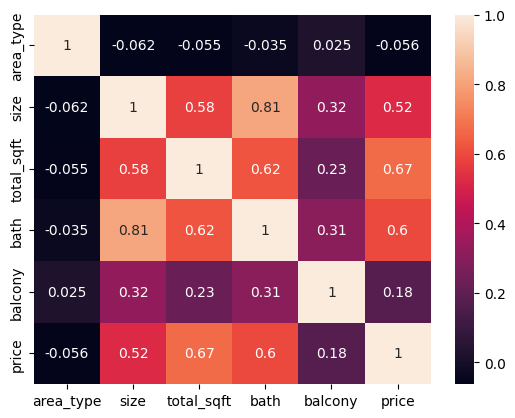

In [176]:
sns.heatmap(df.corr(),annot=True)
plt.show()

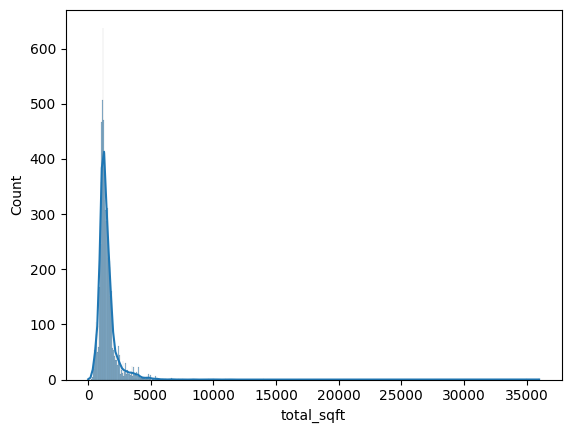

In [177]:
sns.histplot(df['total_sqft'],kde=True)
plt.show()

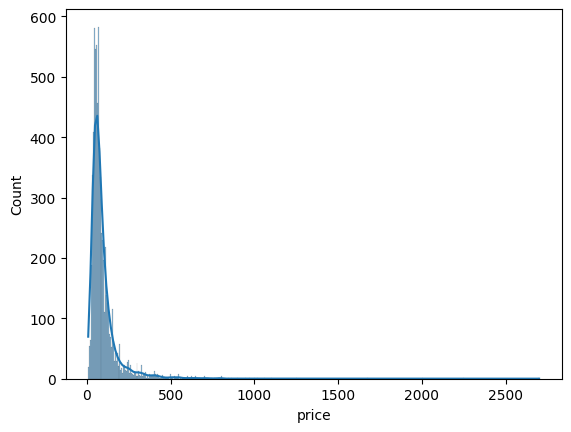

In [178]:
sns.histplot(df['price'],kde=True)
plt.show()

In [179]:
df.columns

Index(['area_type', 'size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [180]:
x = df[['total_sqft','size','area_type']]
y = df[['price']]

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [182]:
lr = LinearRegression()

In [183]:
lr.fit(x_train,y_train)

LinearRegression()

In [184]:
y_pred = lr.predict(x_test)

In [185]:
y_pred

array([[140.4297848 ],
       [ 67.76935156],
       [251.45831716],
       ...,
       [127.70072138],
       [122.03231033],
       [108.06017431]])

In [186]:
r2_score(y_test,y_pred)*100

47.23512734410315